In [1]:
from experiment import Experiment
%matplotlib inline

/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
var_dict = dict(
    numerical_vars = ['Number_of_times_pregnant','Plasma_glucose','Diastolic_blood_pressure',
                      'Triceps_skin_fold_thickness','serum_insulin','Body_mass_index',
                      'Diabetes_pedigree_function','Age'],
    class_var = 'class'
)

In [39]:
exp = Experiment('data/pima.csv', 
                 var_dict,
                 embedding_dim=8,
                 lr=0.1,
                 cv=5,
                 weight_decay=0.0,
                 batch_size=1024,
                 n_epoch=200,
                 verbose=True,
                 n_bins_range=[3, 5, 10],
                 n_init_bins_list=[5, 10, 15])

In [40]:
exp.data.shape

(768, 9)

In [41]:
list_of_scores = exp.perform_exp()

/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:819: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:819: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:819: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:819: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:819: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -


4.618829965591431 training start
>>> Epoch = 1
Loss = 3.0242199897766113
[2, 3, 2, 7, 2, 2, 4, 3] 0.504198846015
>>> Epoch = 2
Loss = 2.57810378074646
[2, 3, 2, 5, 3, 2, 3, 3] 0.668244331839
>>> Epoch = 3
Loss = 2.3774712085723877
[2, 2, 3, 5, 3, 2, 3, 3] 0.720145748987
>>> Epoch = 4
Loss = 2.2098076343536377
[2, 3, 3, 5, 3, 2, 2, 3] 0.763894717453
>>> Epoch = 5
Loss = 2.020040273666382
[2, 3, 2, 2, 3, 2, 3, 3] 0.759190484303
>>> Epoch = 6
Loss = 2.0121476650238037
[2, 3, 2, 5, 3, 2, 3, 3] 0.778505571781
>>> Epoch = 7
Loss = 1.9216214418411255
[2, 3, 2, 5, 3, 2, 2, 3] 0.783869653297
>>> Epoch = 8
Loss = 1.9027107954025269
[2, 3, 2, 2, 3, 2, 2, 3] 0.771881086132
>>> Epoch = 9
Loss = 1.8982371091842651
[2, 2, 2, 3, 3, 2, 2, 3] 0.781098327756
>>> Epoch = 10
Loss = 1.9308266639709473
[2, 3, 2, 2, 3, 2, 2, 3] 0.769358701725
>>> Epoch = 11
Loss = 1.8112393617630005
[2, 2, 2, 5, 3, 2, 3, 2] 0.786012180487
>>> Epoch = 12
Loss = 1.7955888509750366
[2, 3, 2, 5, 3, 2, 3, 2] 0.790137707941
>>> Epo

>>> Epoch = 103
Loss = 1.5279031991958618
[2, 2, 2, 3, 3, 2, 3, 2] 0.830767414727
>>> Epoch = 104
Loss = 1.4998667240142822
[2, 2, 2, 3, 3, 2, 3, 2] 0.8311184265
>>> Epoch = 105
Loss = 1.4718769788742065
[2, 2, 2, 3, 3, 2, 3, 2] 0.830144306537
>>> Epoch = 106
Loss = 1.6149848699569702
[2, 2, 2, 3, 3, 2, 3, 2] 0.833703966839
>>> Epoch = 107
Loss = 1.719438076019287
[2, 2, 2, 3, 3, 2, 3, 2] 0.83379266969
>>> Epoch = 108
Loss = 1.6685019731521606
[2, 2, 2, 3, 3, 2, 3, 2] 0.831764402401
>>> Epoch = 109
Loss = 1.51752507686615
[2, 2, 2, 3, 3, 2, 2, 2] 0.832112701396
>>> Epoch = 110
Loss = 1.6696878671646118
[2, 2, 2, 3, 3, 2, 3, 2] 0.83209353853
>>> Epoch = 111
Loss = 1.4958195686340332
[2, 2, 2, 3, 3, 2, 3, 2] 0.830094782785
>>> Epoch = 112
Loss = 1.5193294286727905
[2, 2, 2, 3, 3, 2, 3, 2] 0.832100595951
>>> Epoch = 113
Loss = 1.6888307332992554
[2, 2, 2, 3, 3, 2, 3, 2] 0.83161523561
>>> Epoch = 114
Loss = 1.5347586870193481
[2, 2, 2, 3, 3, 2, 3, 2] 0.830497855135
>>> Epoch = 115
Loss = 1

>>> Epoch = 3
Loss = 3.0164880752563477
[2, 2, 3, 2, 3, 2, 3, 2] 0.702106409785
>>> Epoch = 4
Loss = 3.0011372566223145
[2, 2, 3, 2, 3, 2, 3, 2] 0.767956179829
>>> Epoch = 5
Loss = 2.8303050994873047
[3, 2, 3, 2, 3, 2, 3, 2] 0.764994288779
>>> Epoch = 6
Loss = 2.692868947982788
[3, 2, 3, 2, 3, 2, 3, 2] 0.78412648736
>>> Epoch = 7
Loss = 2.6937129497528076
[2, 2, 4, 2, 3, 2, 3, 2] 0.793653094919
>>> Epoch = 8
Loss = 2.596851110458374
[2, 2, 4, 2, 3, 2, 3, 3] 0.761081071469
>>> Epoch = 9
Loss = 2.48531174659729
[2, 2, 4, 2, 3, 2, 3, 3] 0.796103623451
>>> Epoch = 10
Loss = 2.562562942504883
[2, 2, 3, 2, 3, 2, 3, 3] 0.763192901187
>>> Epoch = 11
Loss = 2.4302167892456055
[2, 2, 3, 2, 3, 2, 3, 3] 0.762256235862
>>> Epoch = 12
Loss = 2.387216091156006
[3, 2, 3, 2, 3, 2, 3, 3] 0.75521163035
>>> Epoch = 13
Loss = 2.23122239112854
[3, 2, 3, 2, 3, 2, 3, 3] 0.769736567058
>>> Epoch = 14
Loss = 2.468918561935425
[3, 2, 3, 2, 3, 2, 3, 2] 0.769157711178
>>> Epoch = 15
Loss = 2.27763295173645
[3, 2, 

>>> Epoch = 105
Loss = 1.9383445978164673
[3, 2, 3, 3, 3, 2, 2, 2] 0.822077647404
>>> Epoch = 106
Loss = 2.1162800788879395
[3, 2, 3, 3, 3, 2, 2, 2] 0.820905407144
>>> Epoch = 107
Loss = 2.1738312244415283
[3, 2, 3, 3, 3, 2, 2, 2] 0.821037018682
>>> Epoch = 108
Loss = 2.245612144470215
[3, 2, 3, 3, 3, 2, 2, 2] 0.821586534783
>>> Epoch = 109
Loss = 2.105973958969116
[3, 2, 3, 3, 3, 2, 2, 2] 0.822140338313
>>> Epoch = 110
Loss = 2.151066780090332
[3, 2, 3, 3, 3, 2, 2, 2] 0.821962590419
>>> Epoch = 111
Loss = 1.9736237525939941
[3, 2, 3, 3, 3, 2, 2, 2] 0.821543054126
>>> Epoch = 112
Loss = 2.002060651779175
[3, 2, 3, 3, 3, 2, 2, 2] 0.821035634833
>>> Epoch = 113
Loss = 2.1681880950927734
[3, 2, 3, 3, 3, 2, 2, 2] 0.820690350435
>>> Epoch = 114
Loss = 2.038900852203369
[3, 2, 3, 3, 3, 2, 2, 2] 0.820692697931
>>> Epoch = 115
Loss = 1.9154659509658813
[3, 2, 3, 2, 3, 2, 2, 2] 0.819782555545
>>> Epoch = 116
Loss = 2.1421947479248047
[3, 2, 3, 2, 3, 2, 2, 2] 0.820225664085
>>> Epoch = 117
Loss 

>>> Epoch = 6
Loss = 3.076529026031494
[4, 5, 2, 4, 3, 3, 2, 3] 0.579642034226
>>> Epoch = 7
Loss = 3.0323519706726074
[3, 2, 2, 4, 3, 2, 2, 3] 0.622395321058
>>> Epoch = 8
Loss = 2.928734540939331
[4, 2, 2, 4, 3, 2, 2, 3] 0.624248967081
>>> Epoch = 9
Loss = 2.791079044342041
[4, 2, 2, 3, 3, 2, 2, 4] 0.62856567081
>>> Epoch = 10
Loss = 2.9109508991241455
[3, 2, 2, 3, 3, 2, 2, 3] 0.652488347192
>>> Epoch = 11
Loss = 2.7435317039489746
[4, 2, 2, 3, 3, 2, 2, 4] 0.654528471508
>>> Epoch = 12
Loss = 2.7315661907196045
[3, 2, 2, 3, 3, 2, 2, 2] 0.657638686989
>>> Epoch = 13
Loss = 2.508052349090576
[3, 2, 2, 3, 3, 2, 14, 2] 0.676304698942
>>> Epoch = 14
Loss = 2.7904350757598877
[3, 2, 2, 3, 3, 2, 3, 2] 0.679947293532
>>> Epoch = 15
Loss = 2.59745717048645
[3, 2, 2, 3, 3, 2, 3, 2] 0.684483367845
>>> Epoch = 16
Loss = 2.7065513134002686
[3, 2, 2, 3, 3, 2, 3, 2] 0.685915241405
>>> Epoch = 17
Loss = 2.513199806213379
[3, 2, 2, 3, 3, 2, 3, 2] 0.687822924019
>>> Epoch = 18
Loss = 2.589670896530151

/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


>>> Epoch = 102
Loss = 2.2705800533294678
[3, 2, 2, 3, 3, 8, 2, 3] 0.703134756174
>>> Epoch = 103
Loss = 2.205441951751709
[3, 2, 2, 3, 3, 8, 2, 3] 0.702622029004
>>> Epoch = 104
Loss = 2.2425129413604736
[3, 2, 2, 3, 3, 8, 2, 3] 0.704376775247
>>> Epoch = 105
Loss = 2.11902117729187
[3, 2, 2, 3, 3, 8, 2, 3] 0.70373513337
>>> Epoch = 106
Loss = 2.3763344287872314
[3, 2, 2, 3, 3, 8, 2, 3] 0.703375446658
>>> Epoch = 107
Loss = 2.348829507827759
[3, 2, 2, 3, 3, 8, 2, 3] 0.703587548826
>>> Epoch = 108
Loss = 2.526235580444336
[3, 2, 2, 3, 3, 8, 2, 3] 0.705036587103
>>> Epoch = 109
Loss = 2.3560848236083984
[3, 2, 2, 3, 3, 8, 2, 3] 0.705574576525
>>> Epoch = 110
Loss = 2.3879234790802
[3, 2, 2, 3, 3, 8, 2, 3] 0.704749170735
>>> Epoch = 111
Loss = 2.257068395614624
[3, 2, 2, 3, 3, 8, 2, 3] 0.703316737137
>>> Epoch = 112
Loss = 2.2258853912353516
[3, 2, 2, 3, 3, 8, 2, 3] 0.703040733491
>>> Epoch = 113
Loss = 2.3362298011779785
[3, 2, 2, 3, 3, 8, 2, 3] 0.704263373122
>>> Epoch = 114
Loss = 2.2

In [44]:
result = exp.print_scores(list_of_scores)

In [45]:
result.sort_values(by='kmeans_nmi', ascending=False)

,disc_method,dt_acc_depth=2,dt_acc_depth=3,dt_acc_depth=4,dt_acc_depth=5,dt_acc_depth=6,kmeans_nmi,lr_acc_C=0.1,lr_acc_C=0.3,lr_acc_C=0.5,lr_acc_C=1.0,lr_acc_C=3.0,n_disc_cols,nb_acc,rf_acc_n_est=10,rf_acc_n_est=20,rf_acc_n_est=30,rf_acc_n_est=5
4,ew_3,0.745,0.747,0.749,0.742,0.731,0.127316,0.729,0.728,0.728,0.727,0.723,24,0.716,0.741,0.746,0.744,0.738
1,sb_5,0.763,0.763,0.746,0.736,0.745,0.087426,0.746,0.749,0.750,0.753,0.751,18,0.730,0.721,0.723,0.732,0.712
5,ef_3,0.762,0.744,0.723,0.721,0.703,0.086221,0.745,0.750,0.748,0.748,0.749,27,0.727,0.693,0.708,0.702,0.684
2,sb_10,0.746,0.729,0.738,0.733,0.717,0.077091,0.744,0.749,0.746,0.745,0.746,19,0.738,0.733,0.744,0.737,0.711
6,ew_5,0.730,0.725,0.737,0.742,0.742,0.063161,0.758,0.767,0.768,0.770,0.768,40,0.737,0.740,0.731,0.742,0.714
0,raw,0.737,0.729,0.731,0.750,0.723,0.063144,0.764,0.771,0.771,0.771,0.771,8,0.651,0.745,0.764,0.747,0.710
3,sb_15,0.698,0.706,0.712,0.697,0.710,0.055333,0.740,0.740,0.736,0.737,0.736,22,0.728,0.710,0.712,0.702,0.715
8,ew_10,0.678,0.686,0.708,0.723,0.705,0.012159,0.740,0.753,0.753,0.753,0.757,80,0.747,0.717,0.740,0.742,0.704
9,ef_10,0.741,0.716,0.727,0.719,0.721,0.000747,0.746,0.754,0.757,0.747,0.751,72,0.734,0.733,0.738,0.741,0.727
7,ef_5,0.732,0.728,0.747,0.734,0.732,0.000386,0.758,0.745,0.744,0.740,0.745,44,0.744,0.711,0.741,0.742,0.716


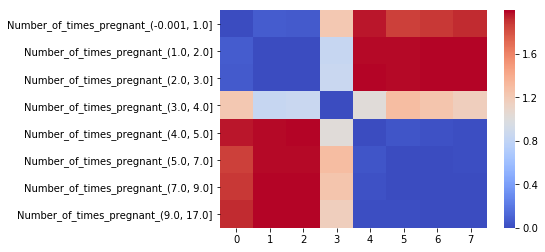

In [46]:
exp.semantic_binning.plot_pairwise_distance_between_bins('Number_of_times_pregnant')

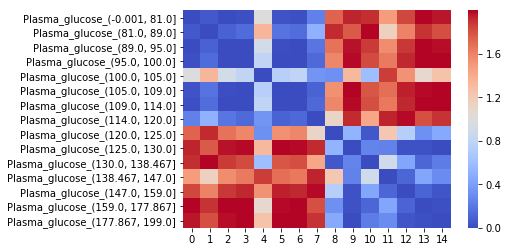

In [47]:
exp.semantic_binning.plot_pairwise_distance_between_bins('Plasma_glucose')

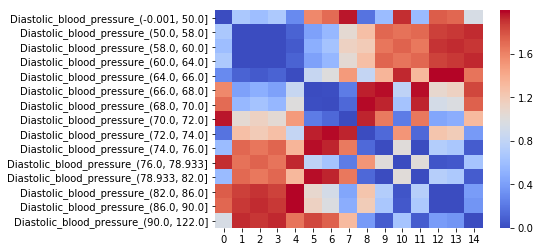

In [48]:
exp.semantic_binning.plot_pairwise_distance_between_bins('Diastolic_blood_pressure')

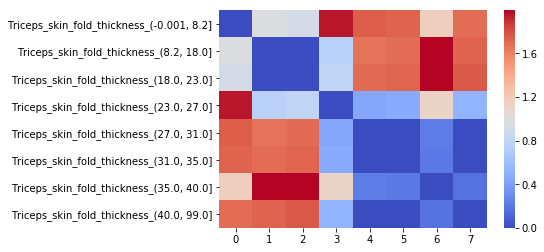

In [49]:
exp.semantic_binning.plot_pairwise_distance_between_bins('Triceps_skin_fold_thickness')

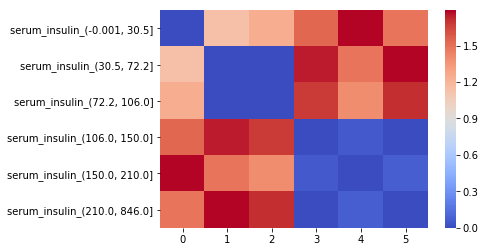

In [50]:
exp.semantic_binning.plot_pairwise_distance_between_bins('serum_insulin')

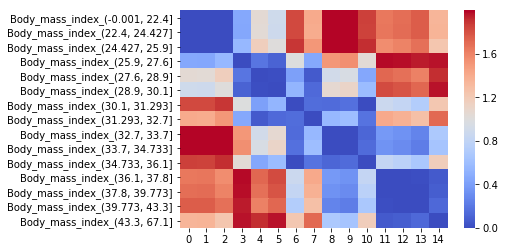

In [51]:
exp.semantic_binning.plot_pairwise_distance_between_bins('Body_mass_index')

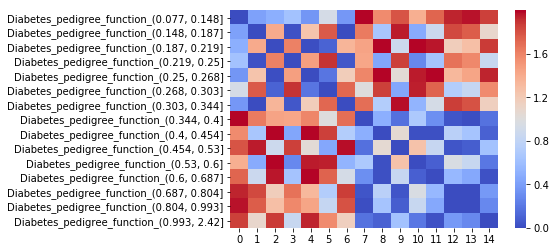

In [57]:
exp.semantic_binning.plot_pairwise_distance_between_bins('Diabetes_pedigree_function')

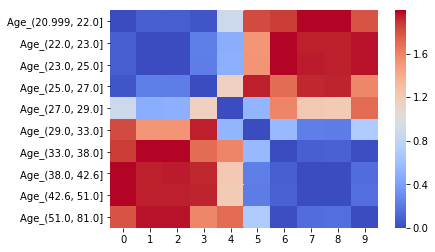

In [53]:
exp.semantic_binning.plot_pairwise_distance_between_bins('Age')

In [54]:
for var, bins in exp.semantic_binning.bins_by_var.items():
    print(var)
    print(bins['bins'])

Number_of_times_pregnant
['(-0.001, 3.0]', '(3.0, 4.0]', '(4.0, 17.0]']
Plasma_glucose
['(-0.001, 120.0]', '(120.0, 199.0]']
Diastolic_blood_pressure
['(-0.001, 72.0]', '(72.0, 122.0]']
Triceps_skin_fold_thickness
['(-0.001, 8.2]', '(8.2, 23.0]', '(23.0, 99.0]']
serum_insulin
['(-0.001, 30.5]', '(30.5, 106.0]', '(106.0, 846.0]']
Body_mass_index
['(-0.001, 25.9]', '(25.9, 32.7]', '(32.7, 36.1]', '(36.1, 67.1]']
Diabetes_pedigree_function
['(0.077, 0.303]', '(0.303, 2.42]']
Age
['(20.999, 27.0]', '(27.0, 33.0]', '(33.0, 81.0]']


In [58]:
from matplotlib import pyplot as plt

def plot_model_comparison_chart(result):
    
    def get_marker_colors(disc_method_list):
        colors = []
        for method in disc_method_list:
            if 'raw' in method:
                colors.append('y')
            if 'sb' in method:
                colors.append('r')
            if 'ew' in method:
                colors.append('b')
            if 'ef' in method:
                colors.append('g')
        return colors
        
    def get_rel_n_cols(result):
        n_cols = result['n_disc_cols']
        max_n_cols = n_cols.max()
        rel_n_cols = [(x / max_n_cols) for x in n_cols]
        return rel_n_cols
    
    def get_rel_acc(model_name, result):
        if model_name == 'DT':
            acc = result['dt_acc_depth=3']
        if model_name == 'LR':
            acc = result['lr_acc_C=1.0']
        if model_name == 'NB':
            acc = result['nb_acc']
        if model_name == 'RF':
            acc = result['rf_acc_n_est=20']
        if model_name == 'K-means':
            acc = result['kmeans_nmi']
        max_acc = acc.max()
        rel_acc = [(x / max_acc) for x in acc]
        return acc
    
    def make_plot_for_model(model_name, disc_method, rel_acc, rel_n_cols, loc, fig):        
        ax = fig.add_subplot(loc)
        ax.scatter(x=rel_n_cols, y=rel_acc, s=200, c=get_marker_colors(disc_method))
        for i, xy in enumerate(zip(rel_n_cols, rel_acc)):
            ax.annotate(disc_method[i], xy, fontsize=15)
        ax.set_title(model_name, fontsize=25)
        ax.set_xlabel('Relative Number of Columns', fontsize=25)
        if model_name == 'K-means':
            ax.set_ylabel('NMI', fontsize=20)        
        else:
            ax.set_ylabel('Accuracy', fontsize=20)        
        
    disc_method = result['disc_method']
    rel_n_cols = get_rel_n_cols(result)
    
    fig = plt.figure(figsize=(20,20))
    for model_name, loc in zip(['DT','LR','RF','K-means'], [221,222,223,224]):
        rel_acc = get_rel_acc(model_name, result)
        make_plot_for_model(model_name, disc_method, rel_acc, rel_n_cols, loc, fig)

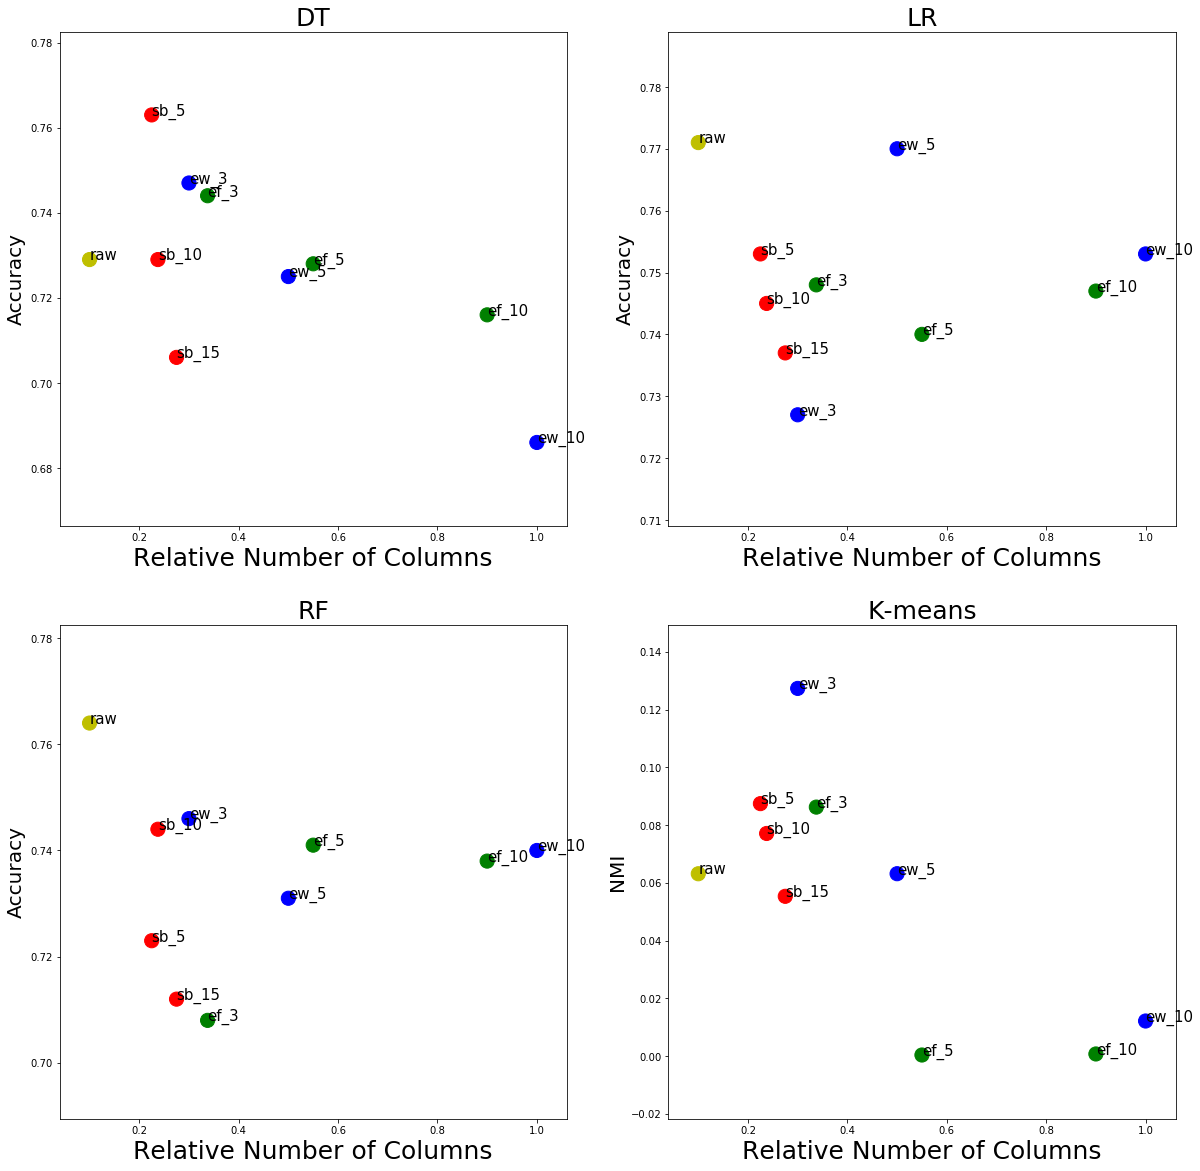

In [59]:
plot_model_comparison_chart(result)